# Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

Importing required libraries

In [2]:
df=pd.read_csv('customer_churn.csv')

Importing dataset

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Sample data of dataset

As we want to predict churned or not , we want to build a classification model

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Datatypes of features most of them were categorical

In [5]:
df.shape

(7043, 21)

Dataset have 7043 rows and 21 columns

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing values in dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Datatypes of features,memory usage of dataset

In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Unique values of each columns

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Statistical summary of dataset,maximum monthly charges where 118

# Visualizations

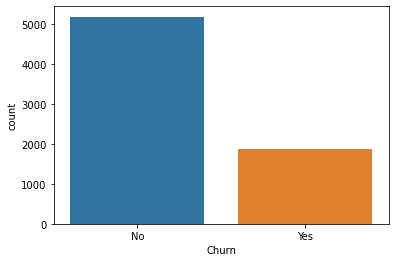

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
sns.countplot('Churn',data=df)
plt.show()
df['Churn'].value_counts()

Most of the customers where not churned as this feature is our target varibale we can see the imbalance of class

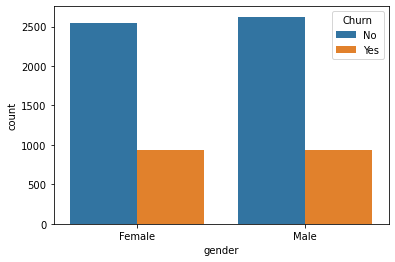

Male      3555
Female    3488
Name: gender, dtype: int64

In [11]:
sns.countplot(x='gender',hue='Churn',data=df)
plt.show()
df['gender'].value_counts()

Most of the male left the company and both males and females stayed equally

Male and females customers are approx. equal

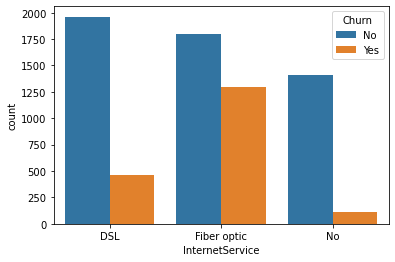

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [12]:
sns.countplot(x='InternetService',hue='Churn',data=df)
plt.show()
df['InternetService'].value_counts()

Most of DSl service customers not churned while fibre optic service customer were churned

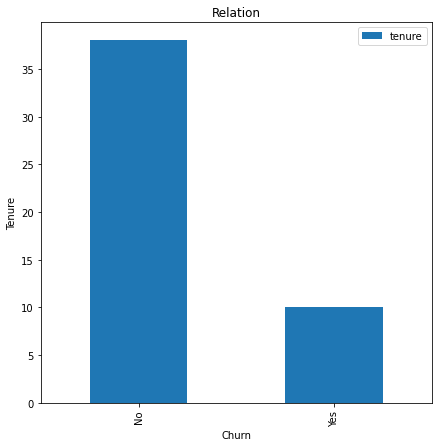

In [13]:
tenure_pivot=df.pivot_table(index='Churn',values='tenure',aggfunc=np.median)

#plotting 
tenure_pivot.plot(kind='bar',figsize=(7,7))
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.title("Relation")
plt.show()

Relation between tenure and churned or not

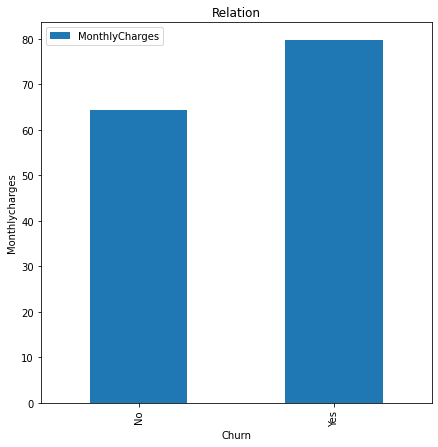

In [14]:
monthly_pivot=df.pivot_table(index='Churn',values='MonthlyCharges',aggfunc=np.median)

#plotting 
monthly_pivot.plot(kind='bar',figsize=(7,7))
plt.xlabel("Churn")
plt.ylabel("Monthlycharges")
plt.title("Relation")
plt.show()

Relation between monthly charges and churned or not

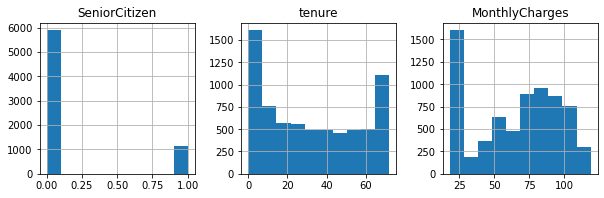

In [15]:
df.hist(figsize=(10,10),layout=(3,3))
plt.show()

Most of the customers are not senior citizen,most of tenure is upto 0-10,monthly charges between 25-30

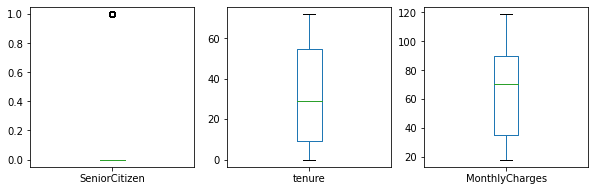

In [16]:
df.plot(kind='box',figsize=(10,10),layout=(3,3),sharex=False,subplots=True)
plt.show()

No outliers

# Data Cleaning

In [17]:
df.drop(['customerID'],axis=1,inplace=True)

Dropping unwanted column customer id is not required for prediction 

# Encoding

In [18]:
for i in df.columns:
    if df[i].dtype==np.number:
        continue
    df[i]=LabelEncoder().fit_transform(df[i])

Encoded categorical columns using label encoder

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


Every categorical changes into numerical

# Seperating independent And Dependent

In [20]:
x=df.drop('Churn', axis = 1)
y = df['Churn']

Seperated features and target

In [21]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


Sample data of features

In [22]:
pd.DataFrame(y.head())

,Churn
0,0
1,0
2,1
3,0
4,1


Sample data of target variable

# Scaling

In [23]:
sc=StandardScaler()
x=sc.fit_transform(x)

Features scaled

# Balancing Class

# Over Sampling

In [24]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Balanced Using smote

In [26]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Balanced

# Model Building

In [27]:
#logistic regression
lr=LogisticRegression()
l=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training accuracy is:- 0.7693596186058498
At random state 0,the testing accuracy is:- 0.7781213761113258


At random state 1,the training accuracy is:- 0.7721943048576214
At random state 1,the testing accuracy is:- 0.7634325473521454


At random state 2,the training accuracy is:- 0.7723231542327019
At random state 2,the testing accuracy is:- 0.7746424429841515


At random state 2 model performs well
At random state 3,the training accuracy is:- 0.7687153717304471
At random state 3,the testing accuracy is:- 0.7723231542327019


At random state 3 model performs well
At random state 4,the training accuracy is:- 0.7720654554825409
At random state 4,the testing accuracy is:- 0.7669114804793197


At random state 4 model performs well
At random state 5,the training accuracy is:- 0.7710346604818966
At random state 5,the testing accuracy is:- 0.7773482798608427


At random state 6,the training accuracy is:- 0.7718077567323799
At random state 6,the testing accuracy is:- 0.76

At random state 55,the testing accuracy is:- 0.7518361035948976


At random state 56,the training accuracy is:- 0.7694884679809303
At random state 56,the testing accuracy is:- 0.7792810204870506


At random state 57,the training accuracy is:- 0.7692307692307693
At random state 57,the testing accuracy is:- 0.7730962504831852


At random state 57 model performs well
At random state 58,the training accuracy is:- 0.7754155392346347
At random state 58,the testing accuracy is:- 0.7510630073444143


At random state 59,the training accuracy is:- 0.7694884679809303
At random state 59,the testing accuracy is:- 0.7866254348666409


At random state 60,the training accuracy is:- 0.770132714856333
At random state 60,the testing accuracy is:- 0.7750289911093932


At random state 61,the training accuracy is:- 0.770390413606494
At random state 61,the testing accuracy is:- 0.7785079242365675


At random state 62,the training accuracy is:- 0.7736116479835072
At random state 62,the testing accuracy is:- 0

At random state 117,the testing accuracy is:- 0.7634325473521454


At random state 118,the training accuracy is:- 0.7706481123566551
At random state 118,the testing accuracy is:- 0.7700038654812524


At random state 118 model performs well
At random state 119,the training accuracy is:- 0.7716789073572993
At random state 119,the testing accuracy is:- 0.7754155392346347


At random state 120,the training accuracy is:- 0.7743847442339905
At random state 120,the testing accuracy is:- 0.7587939698492462


At random state 121,the training accuracy is:- 0.7732250998582657
At random state 121,the testing accuracy is:- 0.7700038654812524


At random state 121 model performs well
At random state 122,the training accuracy is:- 0.7709058111068161
At random state 122,the testing accuracy is:- 0.7773482798608427


At random state 123,the training accuracy is:- 0.7736116479835072
At random state 123,the testing accuracy is:- 0.7638190954773869


At random state 124,the training accuracy is:- 0.768844

At random state 178,the testing accuracy is:- 0.7634325473521454


At random state 179,the training accuracy is:- 0.7696173173560108
At random state 179,the testing accuracy is:- 0.7700038654812524


At random state 179 model performs well
At random state 180,the training accuracy is:- 0.7678134261048833
At random state 180,the testing accuracy is:- 0.7773482798608427


At random state 181,the training accuracy is:- 0.7706481123566551
At random state 181,the testing accuracy is:- 0.7649787398531117


At random state 182,the training accuracy is:- 0.7720654554825409
At random state 182,the testing accuracy is:- 0.7626594511016621


At random state 183,the training accuracy is:- 0.7715500579822188
At random state 183,the testing accuracy is:- 0.7642056436026285


At random state 184,the training accuracy is:- 0.772580852982863
At random state 184,the testing accuracy is:- 0.7657518361035949


At random state 184 model performs well
At random state 185,the training accuracy is:- 0.7734827

Splitted data into trained and test data and finding best random states for logistic regression

In [28]:
l

[2,
 3,
 4,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 16,
 18,
 19,
 20,
 21,
 23,
 24,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 38,
 41,
 43,
 44,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 57,
 65,
 66,
 69,
 70,
 76,
 79,
 80,
 81,
 85,
 86,
 88,
 94,
 103,
 104,
 106,
 109,
 111,
 115,
 116,
 118,
 121,
 128,
 129,
 130,
 134,
 137,
 139,
 141,
 142,
 144,
 147,
 148,
 149,
 150,
 157,
 162,
 164,
 165,
 167,
 168,
 169,
 170,
 171,
 174,
 175,
 177,
 179,
 184,
 185,
 187,
 188,
 193,
 197,
 199]

List of best random states

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=199)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
acc_l=classification_report(y_test,predlr)
print(acc_l)
print(confusion_matrix(y_test,predlr))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1269
           1       0.76      0.79      0.77      1318

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587

[[ 942  327]
 [ 279 1039]]


Applied best random state and print accuracy.confusion matrix and recall for logistic regression

In [32]:
dt=DecisionTreeClassifier()
d=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training accuracy is:- 0.9981961087488725
At random state 0,the testing accuracy is:- 0.7843061461151913


At random state 1,the training accuracy is:- 0.9987115062491947
At random state 1,the testing accuracy is:- 0.7947429454967143


At random state 2,the training accuracy is:- 0.9987115062491947
At random state 2,the testing accuracy is:- 0.803633552377271


At random state 3,the training accuracy is:- 0.9987115062491947
At random state 3,the testing accuracy is:- 0.7866254348666409


At random state 4,the training accuracy is:- 0.9988403556242752
At random state 4,the testing accuracy is:- 0.7843061461151913


At random state 5,the training accuracy is:- 0.998324958123953
At random state 5,the testing accuracy is:- 0.7939698492462312


At random state 6,the training accuracy is:- 0.9985826568741142
At random state 6,the testing accuracy is:- 0.7935833011209895


At random state 7,the training accuracy is:- 0.9987115062491947
At random state 7,the testing accur

At random state 65,the training accuracy is:- 0.998324958123953
At random state 65,the testing accuracy is:- 0.8009277155005798


At random state 66,the training accuracy is:- 0.998324958123953
At random state 66,the testing accuracy is:- 0.793196752995748


At random state 67,the training accuracy is:- 0.9981961087488725
At random state 67,the testing accuracy is:- 0.7873985311171241


At random state 68,the training accuracy is:- 0.9987115062491947
At random state 68,the testing accuracy is:- 0.8009277155005798


At random state 69,the training accuracy is:- 0.9988403556242752
At random state 69,the testing accuracy is:- 0.7982218786238887


At random state 70,the training accuracy is:- 0.9984538074990337
At random state 70,the testing accuracy is:- 0.7901043679938152


At random state 71,the training accuracy is:- 0.9987115062491947
At random state 71,the testing accuracy is:- 0.7982218786238887


At random state 72,the training accuracy is:- 0.998324958123953
At random state 72,the

At random state 128,the testing accuracy is:- 0.8074990336296869


At random state 129,the training accuracy is:- 0.9985826568741142
At random state 129,the testing accuracy is:- 0.7943563973714728


At random state 130,the training accuracy is:- 0.998324958123953
At random state 130,the testing accuracy is:- 0.7924236567452648


At random state 131,the training accuracy is:- 0.9984538074990337
At random state 131,the testing accuracy is:- 0.8005411673753382


At random state 132,the training accuracy is:- 0.9984538074990337
At random state 132,the testing accuracy is:- 0.7881716273676073


At random state 133,the training accuracy is:- 0.998324958123953
At random state 133,the testing accuracy is:- 0.7877850792423656


At random state 134,the training accuracy is:- 0.9984538074990337
At random state 134,the testing accuracy is:- 0.7885581754928489


At random state 135,the training accuracy is:- 0.9984538074990337
At random state 135,the testing accuracy is:- 0.7885581754928489


At r

At random state 193,the testing accuracy is:- 0.7831465017394665


At random state 194,the training accuracy is:- 0.9984538074990337
At random state 194,the testing accuracy is:- 0.7877850792423656


At random state 195,the training accuracy is:- 0.9987115062491947
At random state 195,the testing accuracy is:- 0.7904909161190569


At random state 196,the training accuracy is:- 0.9984538074990337
At random state 196,the testing accuracy is:- 0.7904909161190569


At random state 197,the training accuracy is:- 0.9989692049993557
At random state 197,the testing accuracy is:- 0.7800541167375338


At random state 198,the training accuracy is:- 0.9987115062491947
At random state 198,the testing accuracy is:- 0.7870119829918825


At random state 199,the training accuracy is:- 0.998067259373792
At random state 199,the testing accuracy is:- 0.7908774642442984




Splitted data into train and test data and finding best random state for decision tree

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=199)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
acc_d=classification_report(y_test,preddt)
print(acc_d)
print(confusion_matrix(y_test,preddt))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1269
           1       0.80      0.81      0.81      1318

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

[[1000  269]
 [ 248 1070]]


Applied best random state and print accuracy , confusion matrix.recall for decision tree 

In [36]:
#Kneighbors classifier 
kn=KNeighborsClassifier()
k=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        k.append(i)

At random state 0,the training accuarcy is:- 0.8489885324056178
At random state 0,the testing accuracy is:- 0.7700038654812524


At random state 1,the training accuarcy is:- 0.8483442855302151
At random state 1,the testing accuracy is:- 0.7700038654812524


At random state 2,the training accuarcy is:- 0.8496327792810204
At random state 2,the testing accuracy is:- 0.7758020873598763


At random state 3,the training accuarcy is:- 0.847313490529571
At random state 3,the testing accuracy is:- 0.7672980286045613


At random state 4,the training accuarcy is:- 0.8534982605334364
At random state 4,the testing accuracy is:- 0.7730962504831852


At random state 5,the training accuarcy is:- 0.8495039299059399
At random state 5,the testing accuracy is:- 0.7873985311171241


At random state 6,the training accuarcy is:- 0.8486019842803763
At random state 6,the testing accuracy is:- 0.7785079242365675


At random state 7,the training accuarcy is:- 0.8505347249065842
At random state 7,the testing accu

At random state 63,the training accuarcy is:- 0.8523386161577117
At random state 63,the testing accuracy is:- 0.782759953614225


At random state 64,the training accuarcy is:- 0.8496327792810204
At random state 64,the testing accuracy is:- 0.7935833011209895


At random state 65,the training accuarcy is:- 0.8474423399046515
At random state 65,the testing accuracy is:- 0.7843061461151913


At random state 66,the training accuarcy is:- 0.8460249967787656
At random state 66,the testing accuracy is:- 0.7746424429841515


At random state 67,the training accuarcy is:- 0.8524674655327922
At random state 67,the testing accuracy is:- 0.7765751836103595


At random state 68,the training accuarcy is:- 0.8483442855302151
At random state 68,the testing accuracy is:- 0.7935833011209895


At random state 69,the training accuarcy is:- 0.8484731349052957
At random state 69,the testing accuracy is:- 0.7854657904909161


At random state 70,the training accuarcy is:- 0.847571189279732
At random state 70,t

At random state 126,the training accuarcy is:- 0.8514366705321479
At random state 126,the testing accuracy is:- 0.7816003092385002


At random state 127,the training accuarcy is:- 0.8518232186573895
At random state 127,the testing accuracy is:- 0.7792810204870506


At random state 128,the training accuarcy is:- 0.8477000386548125
At random state 128,the testing accuracy is:- 0.7773482798608427


At random state 129,the training accuarcy is:- 0.845638448653524
At random state 129,the testing accuracy is:- 0.7804406648627754


At random state 130,the training accuarcy is:- 0.8506635742816647
At random state 130,the testing accuracy is:- 0.7835330498647082


At random state 131,the training accuarcy is:- 0.8483442855302151
At random state 131,the testing accuracy is:- 0.7792810204870506


At random state 132,the training accuarcy is:- 0.8469269424043293
At random state 132,the testing accuracy is:- 0.7877850792423656


At random state 133,the training accuarcy is:- 0.8506635742816647
At r

At random state 188,the training accuarcy is:- 0.8407421724004639
At random state 188,the testing accuracy is:- 0.7823734054889834


At random state 189,the training accuarcy is:- 0.8444788042777992
At random state 189,the testing accuracy is:- 0.7812137611132586


At random state 190,the training accuarcy is:- 0.8505347249065842
At random state 190,the testing accuracy is:- 0.7862388867413993


At random state 191,the training accuarcy is:- 0.8527251642829532
At random state 191,the testing accuracy is:- 0.7796675686122922


At random state 192,the training accuarcy is:- 0.8534982605334364
At random state 192,the testing accuracy is:- 0.7750289911093932


At random state 193,the training accuarcy is:- 0.8479577374049736
At random state 193,the testing accuracy is:- 0.7835330498647082


At random state 194,the training accuarcy is:- 0.8458961474036851
At random state 194,the testing accuracy is:- 0.7897178198685736


At random state 195,the training accuarcy is:- 0.8484731349052957
At 

Splitted data into train ad test data , finding best random states

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=199)
kn.fit(x_train,y_train)
predknn=kn.predict(x_test)
acc_k=classification_report(y_test,predknn)
print(acc_k)
print(confusion_matrix(y_test,predknn))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1269
           1       0.73      0.90      0.81      1318

    accuracy                           0.78      2587
   macro avg       0.80      0.78      0.78      2587
weighted avg       0.80      0.78      0.78      2587

[[ 832  437]
 [ 128 1190]]


Applied best random state and print accuracy and confusion matrix for kneighbors 

# Ensemble Technique

In [40]:
#Random Forest classifier 
rf=RandomForestClassifier()
r=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        r.append(i)

At random state 0,the training accuarcy is:- 0.9981961087488725
At random state 0,the testing accuracy is:- 0.8592964824120602


At random state 1,the training accuarcy is:- 0.9987115062491947
At random state 1,the testing accuracy is:- 0.864321608040201


At random state 2,the training accuarcy is:- 0.9987115062491947
At random state 2,the testing accuracy is:- 0.8581368380363356


At random state 3,the training accuarcy is:- 0.9985826568741142
At random state 3,the testing accuracy is:- 0.8496327792810204


At random state 4,the training accuarcy is:- 0.9988403556242752
At random state 4,the testing accuracy is:- 0.855817549284886


At random state 5,the training accuarcy is:- 0.998324958123953
At random state 5,the testing accuracy is:- 0.853884808658678


At random state 6,the training accuarcy is:- 0.9985826568741142
At random state 6,the testing accuracy is:- 0.8569771936606108


At random state 7,the training accuarcy is:- 0.9987115062491947
At random state 7,the testing accurac

At random state 63,the training accuarcy is:- 0.998324958123953
At random state 63,the testing accuracy is:- 0.8542713567839196


At random state 64,the training accuarcy is:- 0.9985826568741142
At random state 64,the testing accuracy is:- 0.8581368380363356


At random state 65,the training accuarcy is:- 0.9981961087488725
At random state 65,the testing accuracy is:- 0.8484731349052957


At random state 66,the training accuarcy is:- 0.998324958123953
At random state 66,the testing accuracy is:- 0.8581368380363356


At random state 67,the training accuarcy is:- 0.9981961087488725
At random state 67,the testing accuracy is:- 0.8562040974101276


At random state 68,the training accuarcy is:- 0.9987115062491947
At random state 68,the testing accuracy is:- 0.8573637417858523


At random state 69,the training accuarcy is:- 0.9987115062491947
At random state 69,the testing accuracy is:- 0.8480865867800541


At random state 70,the training accuarcy is:- 0.9984538074990337
At random state 70,t

At random state 126,the training accuarcy is:- 0.9984538074990337
At random state 126,the testing accuracy is:- 0.8419018167761886


At random state 127,the training accuarcy is:- 0.9981961087488725
At random state 127,the testing accuracy is:- 0.8430614611519134


At random state 128,the training accuarcy is:- 0.9988403556242752
At random state 128,the testing accuracy is:- 0.8527251642829532


At random state 129,the training accuarcy is:- 0.9985826568741142
At random state 129,the testing accuracy is:- 0.8581368380363356


At random state 130,the training accuarcy is:- 0.998324958123953
At random state 130,the testing accuracy is:- 0.8511789717819869


At random state 131,the training accuarcy is:- 0.9984538074990337
At random state 131,the testing accuracy is:- 0.8500193274062621


At random state 132,the training accuarcy is:- 0.9984538074990337
At random state 132,the testing accuracy is:- 0.8639350599149594


At random state 133,the training accuarcy is:- 0.9981961087488725
At r

At random state 188,the training accuarcy is:- 0.9984538074990337
At random state 188,the testing accuracy is:- 0.8461538461538461


At random state 189,the training accuarcy is:- 0.9985826568741142
At random state 189,the testing accuracy is:- 0.8534982605334364


At random state 190,the training accuarcy is:- 0.9987115062491947
At random state 190,the testing accuracy is:- 0.8550444530344028


At random state 191,the training accuarcy is:- 0.9988403556242752
At random state 191,the testing accuracy is:- 0.8465403942790878


At random state 192,the training accuarcy is:- 0.9988403556242752
At random state 192,the testing accuracy is:- 0.8589099342868187


At random state 193,the training accuarcy is:- 0.9985826568741142
At random state 193,the testing accuracy is:- 0.853884808658678


At random state 194,the training accuarcy is:- 0.9984538074990337
At random state 194,the testing accuracy is:- 0.8484731349052957


At random state 195,the training accuarcy is:- 0.9987115062491947
At r

Splitted data into trained and test data and find best random states

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=199)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
acc_r=classification_report(y_test,predrf)
print(acc_r)
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1269
           1       0.85      0.86      0.86      1318

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587

[[1075  194]
 [ 178 1140]]


Applied best random state and and find accuracy and confusion matrix for random forest

In [43]:
#adaboostclassifier
ad=AdaBoostClassifier()
a=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    ad.fit(x_train,y_train)
    pred_train=ad.predict(x_train)
    pred_test=ad.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        a.append(i)

At random state 0,the training accuarcy is:- 0.8219301636387063
At random state 0,the testing accuracy is:- 0.812137611132586


At random state 1,the training accuarcy is:- 0.8210282180131426
At random state 1,the testing accuracy is:- 0.8163896405102435


At random state 1 model performs well
At random state 2,the training accuarcy is:- 0.8238629042649143
At random state 2,the testing accuracy is:- 0.8306919211441824


At random state 3,the training accuarcy is:- 0.8212859167633036
At random state 3,the testing accuracy is:- 0.812137611132586


At random state 4,the training accuarcy is:- 0.820126272387579
At random state 4,the testing accuracy is:- 0.8090452261306532


At random state 5,the training accuarcy is:- 0.8221878623888674
At random state 5,the testing accuracy is:- 0.8218013142636258


At random state 5 model performs well
At random state 6,the training accuarcy is:- 0.8221878623888674
At random state 6,the testing accuracy is:- 0.8156165442597604


At random state 6 model 

At random state 55,the training accuarcy is:- 0.8205128205128205
At random state 55,the testing accuracy is:- 0.8047931967529958


At random state 56,the training accuarcy is:- 0.8172915861358072
At random state 56,the testing accuracy is:- 0.8183223811364515


At random state 56 model performs well
At random state 57,the training accuarcy is:- 0.8180646823862904
At random state 57,the testing accuracy is:- 0.8190954773869347


At random state 57 model performs well
At random state 58,the training accuarcy is:- 0.8228321092642701
At random state 58,the testing accuracy is:- 0.80827212988017


At random state 59,the training accuarcy is:- 0.8212859167633036
At random state 59,the testing accuracy is:- 0.8318515655199072


At random state 60,the training accuarcy is:- 0.8158742430099214
At random state 60,the testing accuracy is:- 0.8314650173946656


At random state 61,the training accuarcy is:- 0.8212859167633036
At random state 61,the testing accuracy is:- 0.8241206030150754


At rand

At random state 111,the training accuarcy is:- 0.8223167117639479
At random state 111,the testing accuracy is:- 0.8136838036335524


At random state 112,the training accuarcy is:- 0.8272129880170082
At random state 112,the testing accuracy is:- 0.8129107073830691


At random state 113,the training accuarcy is:- 0.8207705192629816
At random state 113,the testing accuracy is:- 0.8190954773869347


At random state 113 model performs well
At random state 114,the training accuarcy is:- 0.818193531761371
At random state 114,the testing accuracy is:- 0.8194820255121763


At random state 114 model performs well
At random state 115,the training accuarcy is:- 0.8207705192629816
At random state 115,the testing accuracy is:- 0.8167761886354851


At random state 115 model performs well
At random state 116,the training accuarcy is:- 0.8188377786367736
At random state 116,the testing accuracy is:- 0.8183223811364515


At random state 116 model performs well
At random state 117,the training accuarcy i

At random state 167,the training accuarcy is:- 0.8228321092642701
At random state 167,the testing accuracy is:- 0.8117510630073445


At random state 168,the training accuarcy is:- 0.8198685736374178
At random state 168,the testing accuracy is:- 0.8175492848859683


At random state 168 model performs well
At random state 169,the training accuarcy is:- 0.82038397113774
At random state 169,the testing accuracy is:- 0.8140703517587939


At random state 170,the training accuarcy is:- 0.8220590130137869
At random state 170,the testing accuracy is:- 0.8148434480092771


At random state 171,the training accuarcy is:- 0.8216724648885453
At random state 171,the testing accuracy is:- 0.8264398917665249


At random state 172,the training accuarcy is:- 0.8189666280118542
At random state 172,the testing accuracy is:- 0.8221878623888674


At random state 172 model performs well
At random state 173,the training accuarcy is:- 0.8202551217626595
At random state 173,the testing accuracy is:- 0.8067259373

Splitted data into trained and test data and finding beat random state forada boost classifier

In [44]:
a

[1,
 5,
 6,
 8,
 11,
 12,
 13,
 16,
 17,
 18,
 22,
 23,
 26,
 28,
 29,
 31,
 32,
 35,
 37,
 41,
 42,
 43,
 44,
 47,
 48,
 52,
 53,
 54,
 56,
 57,
 61,
 64,
 65,
 68,
 70,
 72,
 77,
 82,
 83,
 84,
 86,
 90,
 91,
 93,
 94,
 97,
 100,
 104,
 108,
 109,
 113,
 114,
 115,
 116,
 118,
 119,
 123,
 125,
 128,
 129,
 130,
 135,
 136,
 138,
 140,
 141,
 142,
 150,
 157,
 158,
 166,
 168,
 172,
 174,
 175,
 179,
 180,
 184,
 185,
 187,
 188,
 194,
 195,
 197]

List of best random states

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=197)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
acc_a=classification_report(y_test,predad)
print(acc_a)
print(confusion_matrix(y_test,predad))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1307
           1       0.80      0.84      0.82      1280

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

[[1036  271]
 [ 206 1074]]


Applied best random state and print accuracy score,classification report of ada boost classifier

# Cross Validation Score

In [48]:
print("CV score and it's mean of Logistic Regression:",cross_val_score(lr,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predlr))
print("CV score and it's mean of Decision Tree Classifier:",cross_val_score(dt,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,preddt))
print("CV score and it's mean of Kneighbors Classfier:",cross_val_score(kn,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predknn))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predrf))
print("CV score and it's mean of Adaboost classifier:",cross_val_score(ad,x,y,cv=8).mean(),"Accuarcy score:",accuracy_score(y_test,predad))

CV score and it's mean of Logistic Regression: 0.7695224762751757 Accuracy score: 0.46501739466563585
CV score and it's mean of Decision Tree Classifier: 0.7903165869962023 Accuracy score: 0.4855044453034403
CV score and it's mean of Kneighbors Classfier: 0.7905933865744807 Accuracy score: 0.4940085040587553
CV score and it's mean of Random Forest: 0.8584456668949796 Accuracy score: 0.4897564746810978
CV score and it's mean of Adaboost classifier: 0.8131158323680836 Accuarcy score: 0.8156165442597604


CV score and accuracy score of adaboost classifier is approaximately equal so I choose adaboost as my final model

# Hyper Parameter Tuning

In [49]:
parameters={'n_estimators':np.arange(45,60),'learning_rate':[1.0,2.0,3.0,4.0],'algorithm':['SAMME','SAMME.R'],
          'random_state':np.arange(10,16)}

Parameters of ada boost classifier

In [50]:
gsv=GridSearchCV(ad,parameters,cv=8)

Fitted data

In [51]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1.0, 2.0, 3.0, 4.0],
                         'n_estimators': array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'random_state': array([10, 11, 12, 13, 14, 15])})

Fitted data

In [52]:
gsv.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1.0,
 'n_estimators': 57,
 'random_state': 10}

Best parameters after tuning

In [54]:
model=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.0,n_estimators=57,random_state=10)
model.fit(x_train,y_train)
predbest=model.predict(x_test)
acc_b=(accuracy_score(y_test,predbest))
print(acc_b*100)

81.6776188635485


Applying with best parameters

# AUC ROC Curve

In [59]:
#predicting probabilities
y_pred_proba=model.predict_proba(x_test)[:,1] #threshold value
y_pred_proba

array([0.51055515, 0.48126804, 0.48842544, ..., 0.49601189, 0.50266205,
       0.49969879])

In [60]:
#calculating roc curves
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

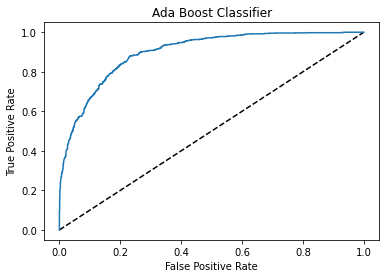

In [61]:
#plotting roc curves
plt.plot([0,1],[0,1],'k--')  #([x-axis],[y-axis],broken lines)
plt.plot(fpr,tpr,label='Ada Boost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ada Boost Classifier')
plt.show()

AUC curve is fine

# Saving Model

In [56]:
import joblib as jb
jb.dump(model,"Best_Churn.pkl")

['Best_Churn.pkl']

Model Saved

# Conclusion

In [58]:
a=np.array(y_test)
predicted=np.array(model.predict(x_test))
Churn=pd.DataFrame({"Original:":a,"Predicted":predicted},index=range(len(a)))
Churn

,Original:,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2582,0,0
2583,1,1
2584,0,0
2585,1,1
